In [12]:
RED  = '#C82506'
BLUE = '#0365C0'
GREEN = '#00882B'
ORANGE = '#DE6A10'
PURPLE = '#773F9B'
YELLOW = '#DCBD23'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def clean(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

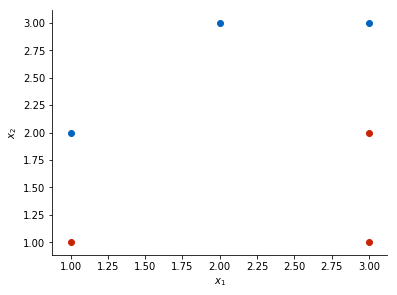

In [13]:
# Our learning problem

plt.figure(figsize=(6, 4.5))

x = np.asarray([[1.0, 2.0], [1.0, 1.0], [2.0, 3.0], [3.0, 3.0], [3.0, 1.0], [3.0, 2.0]])
y = np.asarray([1, 0, 1, 1, 0, 0])

plt.scatter(x[(0, 2, 3), 0], x[(0, 2, 3), 1], color=BLUE)
plt.scatter(x[(1, 4, 5), 0], x[(1, 4, 5), 1], color=RED)

clean(plt.gca())

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.savefig('clsdata.pdf')

In [14]:
# define the loss function
# (here, we pass the data as a parameter, but in the actual loss function these should
#  be seen as constants)

def loss(w1, b, x, y):
    # add some dimensions, so that broadcasting works the way we expect
    # is w and b are vectors
    w1 = w1.reshape(-1, 1)
    b = b.reshape(-1, 1)
    y = y.reshape(1, -1)
    x1= x[:, 0].reshape(1, -1)
    x2= x[:, 1].reshape(1, -1)
    
    pred = np.sign(w1*x1 + x2 + b) * 0.5 + 0.5
    
    print(pred)
    print(y)
    
    res = (pred - y) ** 2
    return res.sum(axis=1)

print(loss(np.asarray([-1.0]), np.asarray([-1.0]), x, y))


[[0.5 0.  0.5 0.  0.  0. ]]
[[1 0 1 1 0 0]]
[1.5]


[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
[[1 0 1 1 0 0]]
[-3.    -2.994 -2.988 ...  2.982  2.988  2.994] [-3.    -3.    -3.    ...  2.994  2.994  2.994] [3. 3. 3. ... 3. 3. 3.]


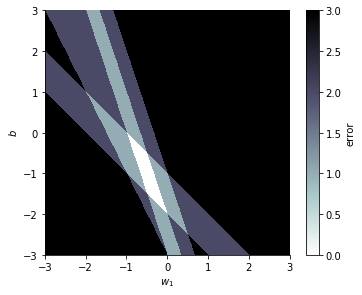

In [15]:
# Plot the loss surface

wr = (-3, 3)
br = (-3, 3)

h = 1000 # step nums in the mesh
ww, bb = np.meshgrid(np.arange(wr[0], wr[1], (wr[1] - wr[0])/h),
                     np.arange(br[0], br[1], (br[1] - br[0])/h))

# zz = clf.predict(n.c_[xx.ravel(), yy.ravel()])
# zz = zz.reshape(xx.shape)

losses = loss(ww.ravel(), bb.ravel(), x, y)

print(ww.ravel(), bb.ravel(), losses)
losses = losses.reshape(ww.shape)

# plot the loss landscape
plt.figure(figsize=(6, 4.5))
#plt.scatter(ww.ravel(), bb.ravel(), c=np.log(losses.ravel()), cmap='copper_r')
#plt.contourf(ww, bb, losses)
plt.imshow(losses, origin='lower', extent= wr+br, cmap='bone_r',) 

plt.xlabel('$w_1$')
plt.ylabel('$b$')

cb = plt.colorbar()
cb.set_label('error')

clean()

plt.savefig('cls-loss-landscape.pdf')

In [16]:
# define the loss function
# (here, we pass the data as a parameter, but in the actual loss function these should
#  be seen as constants)

def loss2(w1, b, x, y):
    # add some dimensions, so that broadcasting works the way we expect
    # if w and b are vectors
    w1 = w1.reshape(-1, 1)
    b = b.reshape(-1, 1)
    y = y.reshape(1, -1)
    x1= x[:, 0].reshape(1, -1)
    x2= x[:, 1].reshape(1, -1)
    
    pred = x1*w1 + x2 + b
    res = (pred - (y* 2.0 - 1.0)) ** 2
    return res.sum(axis=1)

print(loss2(np.asarray([0.5]), np.asarray([1.0]), x, y))

[105.25]


[-3.    -2.994 -2.988 ...  2.982  2.988  2.994] [-3.    -3.    -3.    ...  2.994  2.994  2.994] [371.       369.681188 368.364752 ... 844.209716 846.19484  848.18234 ]


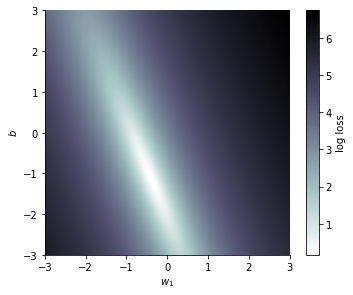

In [17]:
# Plot the loss surface

wr = (-3, 3)
br = (-3, 3)

h = 1000 # step nums in the mesh
ww, bb = np.meshgrid(np.arange(wr[0], wr[1], (wr[1] - wr[0])/h),
                     np.arange(br[0], br[1], (br[1] - br[0])/h))

# zz = clf.predict(n.c_[xx.ravel(), yy.ravel()])
# zz = zz.reshape(xx.shape)

losses = loss2(ww.ravel(), bb.ravel(), x, y)

print(ww.ravel(), bb.ravel(), losses)
losses = losses.reshape(ww.shape)

# plot the loss landscape
plt.figure(figsize=(6, 4.5))
#plt.scatter(ww.ravel(), bb.ravel(), c=np.log(losses.ravel()), cmap='copper_r')
#plt.contourf(ww, bb, losses)
plt.imshow(np.log(losses), origin='lower', extent= wr+br, cmap='bone_r',) 

plt.xlabel('$w_1$')
plt.ylabel('$b$')

cb = plt.colorbar()
cb.set_label('log loss')

clean()

plt.savefig('cls-loss-landscape2.pdf')

In [20]:
# same thing, but in a utility function
def plot_surface():
    wr = (-3, 3)
    br = (-3, 3)

    h = 100 # step nums in the mesh
    ww, bb = np.meshgrid(np.arange(wr[0], wr[1], (wr[1] - wr[0])/h),
                         np.arange(br[0], br[1], (br[1] - br[0])/h))

    # zz = clf.predict(n.c_[xx.ravel(), yy.ravel()])
    # zz = zz.reshape(xx.shape)

    losses = loss2(ww.ravel(), bb.ravel(), x, y)

    print(ww.ravel(), bb.ravel(), losses)
    losses = losses.reshape(ww.shape)

    # plot the loss landscape
    #plt.scatter(ww.ravel(), bb.ravel(), c=np.log(losses.ravel()))
    #plt.contourf(ww, bb, losses)
    plt.imshow(np.log(losses), origin='lower', extent= wr+br, cmap='bone_r') 

    plt.xlabel('$w_1$')
    plt.ylabel('$b$')

[-54.5 -20.5]
[-3.   -2.94 -2.88 ...  2.82  2.88  2.94] [-3.   -3.   -3.   ...  2.94  2.94  2.94] [371.     357.9188 345.0752 ... 784.3316 803.564  823.034 ]


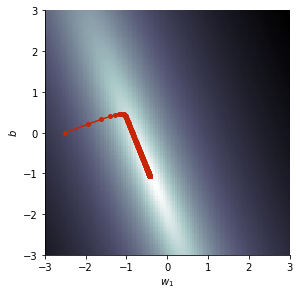

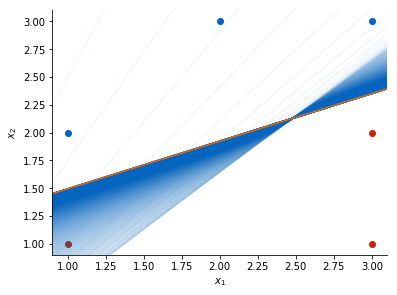

In [29]:
# GD search

def gradient(w1, b, x, y):
    # add some dimensions, so that broadcasting works the way we expect
    # is w and b are vectors
    w1 = w1.reshape(-1, 1)
    b = b.reshape(-1, 1)
    y = y.reshape(1, -1)

    x1 = x[:, 0].reshape(1, -1)
    x2 = x[:, 1].reshape(1, -1)
    
    pred = x1*w1 + x2 + b
    res = (pred - (y* 2.0 - 1.0)).ravel()
    return ((res * x1).sum(), (res).sum())

# fix the random seed, so the experiment is repeatable
np.random.seed(9)

learnrate= 0.01
its = 500

sequence = np.zeros((1, 2))

current = np.asarray([-2.5, 0])

sequence[0,:] = current

for i in range(its):

    # sample random point on the unit hypersphere: 
    #  - sample standard normally distributed numbers for each dimension
    gw, gs = gradient(current[0], current[1], x, y) 
    grad = np.asarray([gw, gs])
    
    if i % 1000 == 0:
        print(grad)
    
    current = current - learnrate * grad
    
    sequence = np.concatenate((sequence, current.reshape(1, -1)))
    
plt.figure(figsize=(6, 4.5))

plot_surface()
plt.plot(sequence[:,0], sequence[:,1], marker='o', markersize=4, color=RED)

clean()

plt.savefig('gradient-descent-cls.pdf')
        
# Plot the model in feature space

xlin = np.linspace(0.0, 3.5, 10)

plt.figure(figsize=(6, 4.5))

l = sequence.shape[0]

plt.scatter(x[(0, 2, 3), 0], x[(0, 2, 3), 1], color=BLUE)
plt.scatter(x[(1, 4, 5), 0], x[(1, 4, 5), 1], color=RED)
clean(plt.gca())

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

for i in range(l):
    
    w1 = sequence[i, 0]
    b = sequence[i, 1]
    
    plt.plot(xlin, - w1 * xlin - b, color=BLUE, alpha= 0.05 + 0.3 * (i/l))

w1 = sequence[-1, 0]
b = sequence[-1, 1]    
    
plt.plot(xlin, - w1 * xlin - b, color=ORANGE)

plt.xlim(0.9, 3.1)
plt.ylim(0.9, 3.1)

plt.savefig('gradient-descent-fp-cls.pdf')

[-3.   -2.94 -2.88 ...  2.82  2.88  2.94] [-3.   -3.   -3.   ...  2.94  2.94  2.94] [37.54978336 36.94655959 36.3435379  ... 48.67883966 49.19807378
 49.71731606]


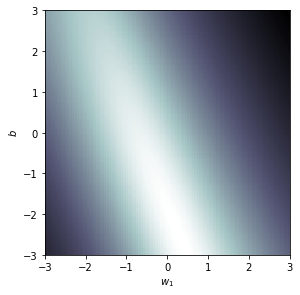

In [24]:
# GD search
def sigmoid(t):
    return 1.0/(1 + np.exp(t))

def loss_LR(w1, b, x, y):
    # add some dimensions, so that broadcasting works the way we expect
    # if w and b are vectors
    w1 = w1.reshape(-1, 1)
    b = b.reshape(-1, 1)
    y = y.reshape(1, -1)
    x1= x[:, 0].reshape(1, -1)
    x2= x[:, 1].reshape(1, -1)
    
    pred = sigmoid(x1*w1 + x2 + b)
    res = - y * np.log2(pred) - (1-y) * np.log2(1-pred)
    return res.sum(axis=1)

def plot_surface_LR():
    wr = (-3, 3)
    br = (-3, 3)

    h = 100 # step nums in the mesh
    ww, bb = np.meshgrid(np.arange(wr[0], wr[1], (wr[1] - wr[0])/h),
                         np.arange(br[0], br[1], (br[1] - br[0])/h))

    # zz = clf.predict(n.c_[xx.ravel(), yy.ravel()])
    # zz = zz.reshape(xx.shape)

    losses = loss_LR(ww.ravel(), bb.ravel(), x, y)

    print(ww.ravel(), bb.ravel(), losses)
    losses = losses.reshape(ww.shape)

    # plot the loss landscape
    #plt.scatter(ww.ravel(), bb.ravel(), c=np.log(losses.ravel()))
    #plt.contourf(ww, bb, losses)
    plt.imshow(np.log(losses), origin='lower', extent= wr+br, cmap='bone_r') 

    plt.xlabel('$w_1$')
    plt.ylabel('$b$')
    
plt.figure(figsize=(6, 4.5))

plot_surface_LR()

[-54.5 -20.5]
[-0.00025284  0.00062707]
[-3.   -2.94 -2.88 ...  2.82  2.88  2.94] [-3.   -3.   -3.   ...  2.94  2.94  2.94] [37.54978336 36.94655959 36.3435379  ... 48.67883966 49.19807378
 49.71731606]


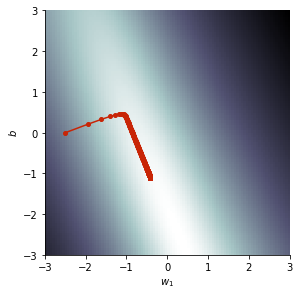

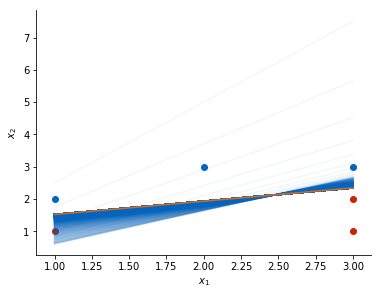

In [26]:
def gradient_LR(w1, b, x, y):
    # add some dimensions, so that broadcasting works the way we expect
    # is w and b are vectors
    w1 = w1.reshape(-1, 1)
    b = b.reshape(-1, 1)
    y = y.reshape(1, -1)

    x1 = x[:, 0].reshape(1, -1)
    x2 = x[:, 1].reshape(1, -1)
    
    pred = sigmoid(x1*w1 + x2 + b)
    pw1 = (y - pred) * x1
    pb = (pred - y)
    return (resw1.sum(axis=1), resb.sum(axis=1))

# fix the random seed, so the experiment is repeatable
np.random.seed(9)

learnrate= 0.01
its = 1500

sequence = np.zeros((1, 2))

current = np.asarray([-2.5, 0])

sequence[0,:] = current

for i in range(its):

    # sample random point on the unit hypersphere: 
    #  - sample standard normally distributed numbers for each dimension
    gw, gs = gradient(current[0], current[1], x, y) 
    grad = np.asarray([gw, gs])
    
    if i % 1000 == 0:
        print(grad)
    
    current = current - learnrate * grad
    
    sequence = np.concatenate((sequence, current.reshape(1, -1)))
    
plt.figure(figsize=(6, 4.5))

plot_surface_LR()
plt.plot(sequence[:,0], sequence[:,1], marker='o', markersize=4, color=RED)

clean()

plt.savefig('gradient-descent-logreg.pdf')
        
# Plot the model in feature space

xlin = np.linspace(1.0, 3.0, 10)

plt.figure(figsize=(6, 4.5))

l = sequence.shape[0]

plt.scatter(x[(0, 2, 3), 0], x[(0, 2, 3), 1], color=BLUE)
plt.scatter(x[(1, 4, 5), 0], x[(1, 4, 5), 1], color=RED)
clean(plt.gca())

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

for i in range(l):
    
    w1 = sequence[i, 0]
    b = sequence[i, 1]
    
    plt.plot(xlin, - w1 * xlin - b, color=BLUE, alpha= 0.05 + 0.3 * (i/l))

w1 = sequence[-1, 0]
b = sequence[-1, 1]    
    
plt.plot(xlin, - w1 * xlin - b, color=ORANGE)

plt.savefig('gradient-descent-fp-logreg.pdf')